# Features Exploration

1. User Language
2. Profile Category
3. Profile Cratin Timestamps
4. Is Profile View Customized
5. Username
6. Profile Verification Status

In [3]:
# Imports and set up
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from imblearn.under_sampling import RandomUnderSampler
from sklearn.datasets import make_classification

from .utils.missing_values_filler import MissingValuesFiller

ImportError: attempted relative import with no known parent package

In [18]:
# Load train dataset
raw_df = pd.read_csv("../src_data/train.csv")

# User Language

en       5321
es        869
pt        255
fr        223
tr        157
ja        129
it        115
de         84
en-gb      61
ar         58
ko         56
ru         49
nl         48
id         19
pl         15
cs          7
sv          6
ca          5
fi          5
el          4
zh-cn       4
th          2
sk          2
da          2
uk          1
sr          1
hu          1
zh-TW       1
Name: User Language, dtype: int64
Not english count: 2179


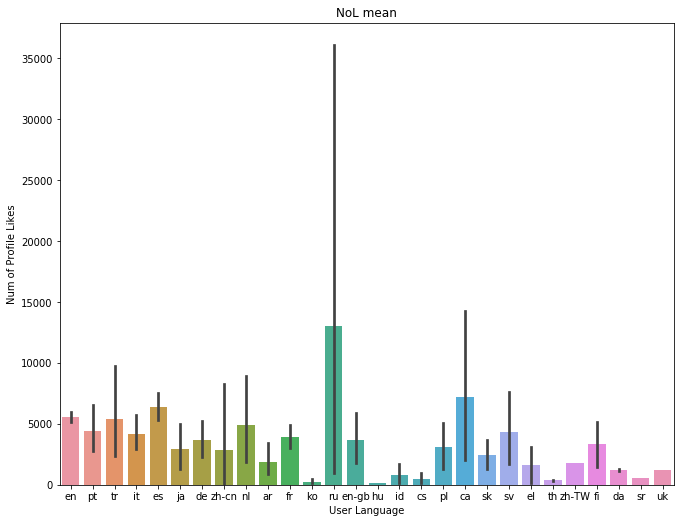

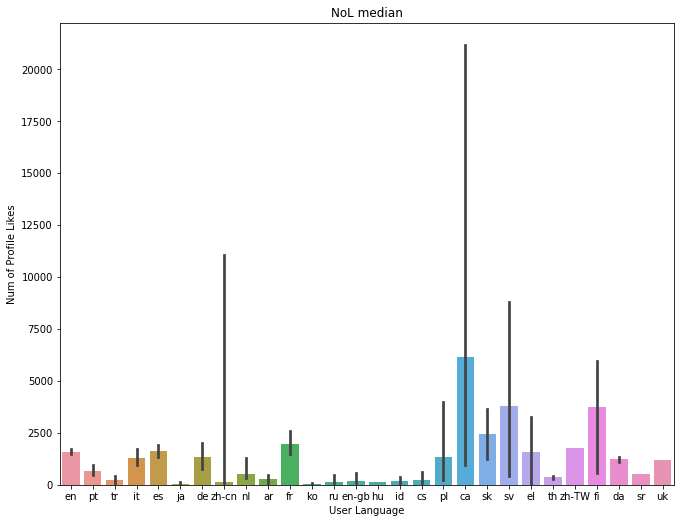

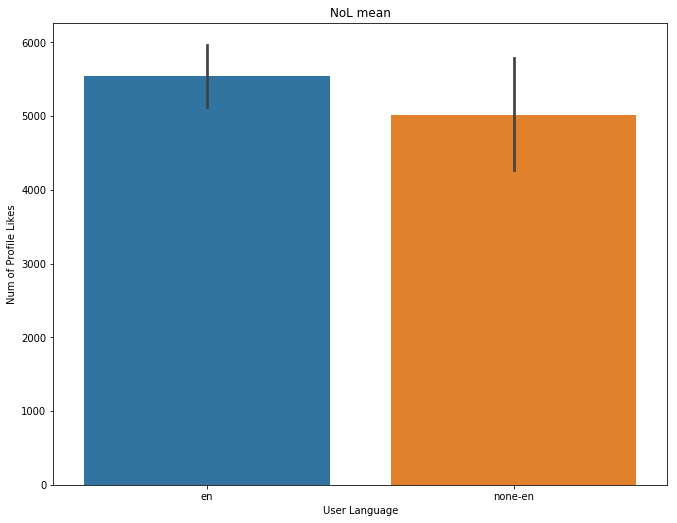

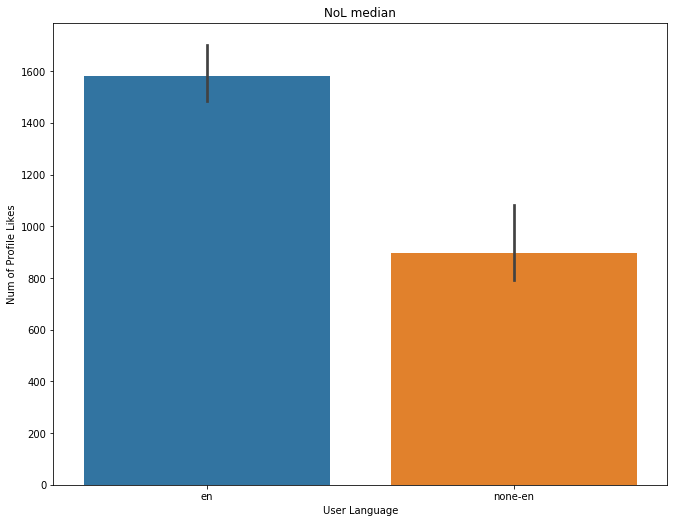

In [19]:
value_counts = raw_df['User Language'].value_counts()
print(value_counts)
print("Not english count: {}".format(len(raw_df[raw_df['User Language'] != 'en'])))

fig, ax = plt.subplots()
fig.set_size_inches(11, 8.5)
sns.barplot(x="User Language", y="Num of Profile Likes", data=raw_df, estimator=np.mean).set_title('NoL mean')
plt.show()

fig, ax = plt.subplots()
fig.set_size_inches(11, 8.5)
sns.barplot(x="User Language", y="Num of Profile Likes", data=raw_df, estimator=np.median).set_title('NoL median')
plt.show()

# Separate 'en' and none-'en' records
lang_df = raw_df.copy(deep=True)
lang_df['User Language'] = raw_df['User Language'].apply(lambda val: 'en' if val == 'en' else 'none-en')

fig, ax = plt.subplots()
fig.set_size_inches(11, 8.5)
sns.barplot(x="User Language", y="Num of Profile Likes", data=lang_df, estimator=np.mean).set_title('NoL mean')
plt.show()

fig, ax = plt.subplots()
fig.set_size_inches(11, 8.5)
sns.barplot(x="User Language", y="Num of Profile Likes", data=lang_df, estimator=np.median).set_title('NoL median')
plt.show()

# Profile Category

unknown       3360
business      1839
celebrity     1401
government     660
               240
Name: Profile Category, dtype: int64
unknown       3600
business      1839
celebrity     1401
government     660
Name: Profile Category, dtype: int64


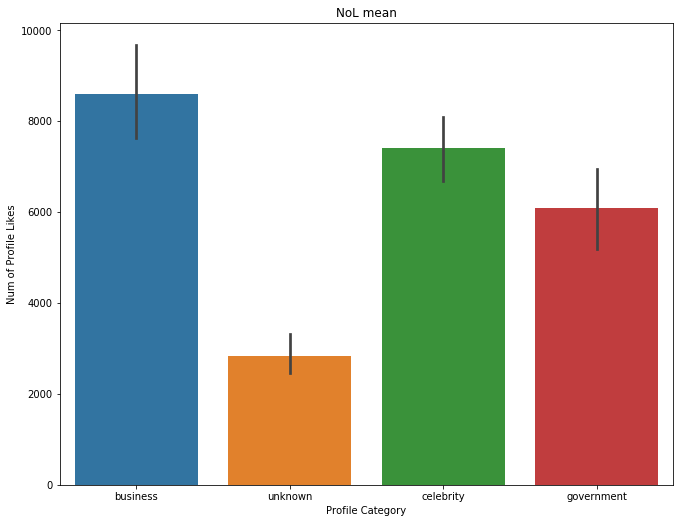

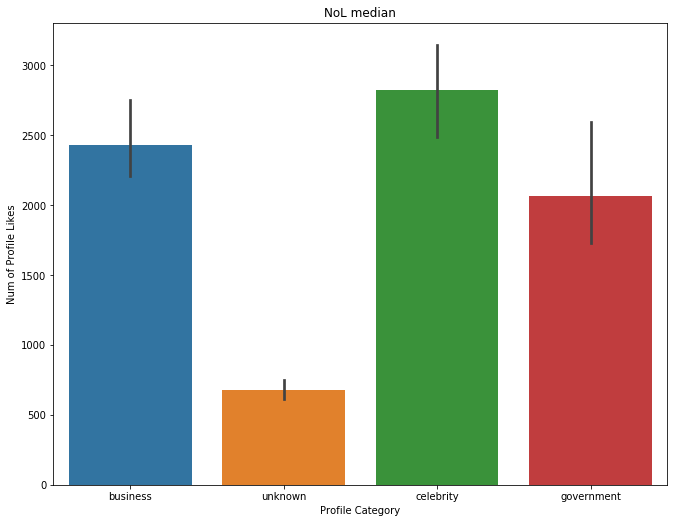

Values counts (before):
0    1839
1    1401
2     660
Name: Profile Category Code, dtype: int64
Values counts (after):
0    1379
1    1073
2     486
Name: Profile Category Code, dtype: int64


In [61]:
value_counts = raw_df['Profile Category'].value_counts()
print(value_counts)

# Clean
profile_df = raw_df.copy(deep=True)
profile_df = profile_df[['Profile Category', 'Num of Profile Likes']]
profile_df['Profile Category'] = profile_df['Profile Category'].replace(r'^\s*$', 'unknown', regex=True)
value_counts = profile_df['Profile Category'].value_counts()
print(value_counts)

fig, ax = plt.subplots()
fig.set_size_inches(11, 8.5)
sns.barplot(x="Profile Category", y="Num of Profile Likes", data=profile_df, estimator=np.mean).set_title('NoL mean')
plt.show()

fig, ax = plt.subplots()
fig.set_size_inches(11, 8.5)
sns.barplot(x="Profile Category", y="Num of Profile Likes", data=profile_df, estimator=np.median).set_title('NoL median')
plt.show()